In [1]:
import os
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from chest_radiography import *


In [2]:
annot_df = pd.read_csv("./pneumonia/annot.csv")
imgs = os.listdir("./pneumonia/images")
sampls = os.listdir("./pneumonia/samples")

In [3]:
print(annot_df.shape)
annot_df.head(7)

(30227, 6)


,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1
6,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0


In [4]:
annot_df['patientId'].unique().shape

(26684,)

In [5]:
annot_df['Target'].mean().round(3)

0.316

### inflamation area size

In [19]:
width = np.nanmean(annot_df['width'].values)
height = np.nanmean(annot_df['height'].values)
print("avg width:", width.round())
print("avg height:", height.round())

avg width: 218.0
avg height: 329.0


In [22]:
annot_df.loc[:, "x":"height"].describe().round().loc["25%":"75%",:]

,x,y,width,height
25%,207.0,249.0,177.0,203.0
50%,324.0,365.0,217.0,298.0
75%,594.0,478.0,259.0,438.0


### number CXR records

In [6]:
print("number of patients:", len(imgs))
print("small sample size:  ", len(sampls))

number of patients: 26684
small sample size:   3000


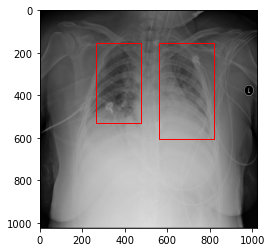

In [7]:
im = Image.open('./pneumonia/images/' + '00436515-870c-4b36-a041-de91049b9ab4.jpg')

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(im, cmap='gray')

# Create a Rectangle patch
rect1 = patches.Rectangle((264.0, 152.0), 213.0, 379.0, linewidth=1, edgecolor='r', facecolor='none')
rect2 = patches.Rectangle((562.0, 152.0), 256.0, 453.0, linewidth=1, edgecolor='r', facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect1)
ax.add_patch(rect2)
plt.show()

In [8]:
print(im)

<PIL.JpegImagePlugin.JpegImageFile image mode=L size=1024x1024 at 0x7FD8D7997E50>


In [9]:
im_bytes = img_to_bytes(img=im)

In [10]:
im_back = Image.open(io.BytesIO(im_bytes))

In [11]:
# x, y, x+width, y+height
a = [
	im.crop((264.0, 152.0, 264.0 + 213.0, 152.0 + 379.0)),
	im.crop((562.0, 152.0, 562.0 + 256.0, 152.0 + 453.0))
	]

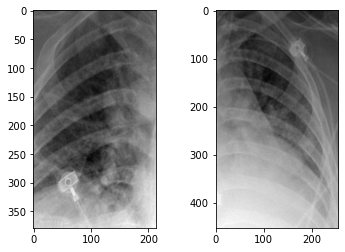

In [12]:
fig, ax = plt.subplots(1, 2)
for i in range(len(ax)):
	ax[i].imshow(a[i], cmap='gray')